##### DNA Sequencing With Machine Learning

Creating a classification model that can predict a gene's function based on the DNA sequence of the coding sequence alone.

<p align="right">submitted by :<br>rakshit bhardwaj 102066003<br>Vishal Bansal 102066008<br>3CS11</p>

<h5>Introduction</h5>
A genome is a complete collection of DNA in an organism. All living species possess a genome, but they differ considerably in size. The human genome, for instance, is arranged into 23 chromosomes, which is a little bit like an encyclopedia being organized into 23 volumes. And if you counted all the characters (individual DNA “base pairs”), there would be more than 6 billion in each human genome. So it’s a huge compilation.


A human genome has about 6 billion characters or letters. If you think the genome(the complete DNA sequence) is like a book, it is a book about 6 billion letters of “A”, “C”, “G” and “T”. Now, everyone has a unique genome. Nevertheless, scientists find most parts of the human genomes are like each other.


As a data-driven science, genomics extensively utilizes machine learning to capture dependencies in data and infer new biological hypotheses. Nonetheless, the ability to extract new insights from the exponentially increasing volume of genomics data requires more powerful machine learning models. By efficiently leveraging large data sets, deep learning has reconstructed fields such as computer vision and natural language processing. It has become the method of preference for many genomics modeling tasks, including predicting the influence of genetic variation on gene regulatory mechanisms such as DNA receptiveness and splicing.

<h5>How is a DNA Sequence represented?</h5>
The diagram shows a tiny bit of a DNA double helix structure.<br><br>
<img src = "Screenshot_94.png" alt="dna helix">
<br><br>

The double-helix is the correct chemical representation of DNA. But DNA is special. It’s a nucleotide made of four types of nitrogen bases: Adenine (A), Thymine (T), Guanine (G), and Cytosine. We always call them A, C, G and T.


These four chemicals link together via hydrogen bonds in any possible order making a chain, and this gives one thread of the DNA double-helix. And the second thread of the double-helix balance the first. So if you have A on the first thread, you have to have T on the second. 


Furthermore, C and G always balance each other. So once you identify one thread of the helix, you can always spell the other.
<br><br>
<img src = "Screenshot_95.png" alt="dna helix">
<br><br>
The order, or sequence, of these bases, determines what biological instructions are contained in a strand of DNA. For example, the sequence ATCGTT might instruct for blue eyes, while ATCGCT might instruct for brown.





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


<h5>Gene sequence function groups.</h5>

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

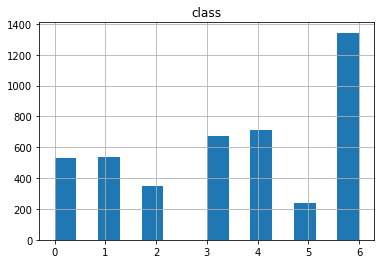

In [4]:
human_data.hist(bins = 14)

##### Treating DNA sequence as a "language", otherwise known as  k-mer counting

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

method : 
take the long biological sequence and break it down into k-mer length [6 here] overlapping “words”.
count the occurances of each possible k-mer sequence.

function to convert any sequence (string) to overlapping k-mer words :

In [5]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

convert training data sequences into short overlapping  k-mers of length 6.  

In [6]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)

In [7]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.Make a y variable to hold the class labels.

In [8]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values                         

applying the BAG of WORDS using CountVectorizer

In [9]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
print(X.shape)

(4380, 232414)


In [10]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


<h5>create multinomial naive Bayes classifier</h5
>

In [16]:

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

<h4>Performance Metrics</h4>
confusion matrix and accuracy

In [34]:
def calc_acc(c,y_pred,y_test):
    for i in range(y_test.size):
        if(y_test[i] == y_pred[i]):
            c += 1
    return (c/y_test.size) * 100
            

In [35]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
accuracy = calc_acc(0,y_pred,y_test)
print("\n\naccuracy = ",accuracy,"%")

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263


accuracy =  98.40182648401826 %
